<a href="https://colab.research.google.com/github/Akutagawa50/Google_Colaboratory/blob/main/or_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 授業内容

## ライブラリのインポート
numpy，matplotlib，confusion_matrixをインポート

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

## 形式ニューロンを関数で実装

In [36]:
def formal_neuron(x1,x2):
  w1 = 2.0
  w2 = 1.0
  theta = -1
  h= w1*x1 + w2*x2
  return 1 * (h > theta)
  

In [37]:
for i in range(2):
  for j in range(2):
    print(formal_neuron(i,j))

1
1
1
1


## OR関数を実装

In [46]:
def or_func(x1,x2):
  w1 = 1.10 #重み1,決め打ち
  w2 = 1.10 #重み2，決め打ち
  theta = 1 #閾値
  #h= w1*x1 + w2*x2
  h= w1*x1 + w2*x2 - theta
  return 1 * (h > 0)

In [47]:
for i in range(2):
  for j in range(2):
    print(or_func(i,j))

0
1
1
1


## 単位ステップ関数

Text(0, 0.5, 'U(x)')

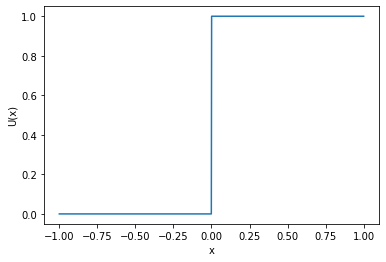

In [44]:
x=np.linspace(-1,1,1000)
y=1*(x>0)
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("U(x)")


$x_1$を$x$軸，$x_2$を$y$軸にとると，or_funcの中の計算は
$$w_1\times x + w_2 \times y - \theta>0$$
と書き換えられる
また出力が変化する境界を表す直線は
$$w_1\times x + w_2 \times y - \theta=0$$
で表せる．これを$y$について変形すると
$$y=-\frac{w_1}{w_2}\times x + w_2  + \frac{\theta}{w_2}$$
ここで$\frac{\theta}{w_2}$は定数になるので，これを改めて$\theta$とおく
$$y=-\frac{w_1}{w_2}\times x + w_2  + \theta$$
この直線を**識別平面**という．

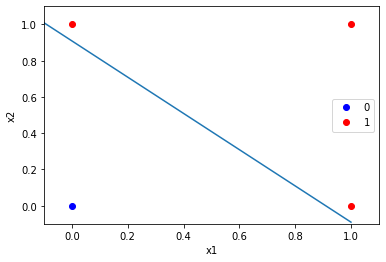

In [48]:
x=np.linspace(-0.1, 1)
y=-(1.1/1.1)*x+(1/1.1)
plt.xlim(-0.1,1.1)
plt.ylim(-0.1,1.1)
plt.xlabel("x1")
plt.ylabel("x2")
plt.plot(0,0,'bo', label="0")
plt.plot(0,1,'ro', label="1")
plt.plot(1,0,'ro')
plt.plot(1,1,'ro')
plt.plot(x,y)
plt.legend()

## パーセプトロンの学習

In [49]:
from sklearn.datasets import load_iris

In [50]:
iris=load_iris() #データセットを読み込む
X=iris.data[:100] #100個目までのデータセットを読み込む
y=iris.target[:100] 

## 単純パーセプトロンを関数化



In [56]:
def perceptron(w,x):
  xT=np.array(x,ndmin=2).T
  h=np.dot(w[:-1],xT)+w[-1]
  return 1*(h>0)

## 学習条件の設計，初期化

In [81]:
w=np.random.rand(5) #パラメータ４つ + 閾値
learning_rate=0.01 #学習率
epoch = 100 #学習回数
print(w) #ランダムなwの初期値を出力

[0.9311977  0.03077871 0.33142704 0.27890777 0.23333209]


### 学習前の混同行列を表示
混同行列を見ると正答率が50%になっているため，ランダムに答えていると同意になっている．

In [54]:
y_pred=perceptron(w,X)
confusion_matrix(y,y_pred)

array([[ 0, 50],
       [ 0, 50]])

## 学習パート

In [82]:
for i in range(epoch):
  for j in range(len(y)):
    error=y[j]-perceptron(w,X[j]) #エラーを計算
    for k in range(len(w)):
      if k==4: #閾値の計算は例外
        w[4] += error*learning_rate*1
      else:
        w[k] += error*learning_rate*X[j,k]
print(w)

[ 0.1491977  -0.49422129  0.10542704  0.24590777  0.07333209]


## 学習後の混同行列
混同行列から正答率が100%になっていることがわかる

In [83]:
y_pred=perceptron(w,X)
confusion_matrix(y,y_pred)

array([[50,  0],
       [ 0, 50]])

## 活性化関数
活性化関数の一種であるシグモイド関数は，微分可能であるり，誤差を連続値にすることができる．
$$\rm{sigmoid}( {\it{x}} )=\frac{1}{1+\it{e}^{-x}}$$

In [3]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

Text(0, 0.5, 'U(x)')

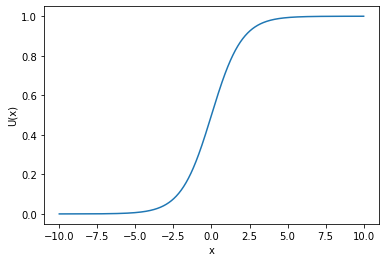

In [86]:
x=np.linspace(-10,10,1000)
y=sigmoid(x)
plt.plot(x,y)
plt.xlabel("x")
plt.ylabel("U(x)")

## シグモイド関数を用いたパーセプトロン

In [100]:
def perceptron_sigmoid(w,x):
  xT=np.array(x,ndmin=2).T
  h=np.dot(w[:-1],xT)+w[-1]
  return sigmoid(h)

# 課題
* 3入力のOR関数を機械学習を使って実装する
  * 活性化関数はどれでも
  * 混同行列を使って結果を可視化


## 学習

### 学習条件の設定，初期化
* 入力: w, X
  * w:重みベクトル
  * X:入力ベクトルのデータセット

* 出力: y
* 学習率: learning_rate
* エポック: epoch


In [113]:

X=np.array([[0,0,0],[0,0,1],[0,1,0],[0,1,1],[1,0,0],[1,0,1],[1,1,0],[1,1,1]])
y=np.array([0,1,1,1,1,1,1,1])
w=np.random.rand(len(X[0])+1) #重みベクトル + 閾値
learning_rate=0.01 #学習率
epoch = 100 #学習回数
print(w) #ランダムなwの初期値を出力

[0.92152365 0.78294563 0.02583021 0.93438942]


### 学習前の混同行列を表示
混同行列を見ると入力[0,0,0]の認識ができていないことがわかる．

In [114]:
y_pred=perceptron(w,X)
confusion_matrix(y,y_pred)

array([[0, 1],
       [0, 7]])

## 学習パート

In [116]:
for i in range(epoch):
  for j in range(len(y)):
    error=y[j]-perceptron(w,X[j]) #エラーを計算
    for k in range(len(w)):
      if k==len(w)-1: #閾値の計算は例外
        w[k] += error*learning_rate*1
      else:
        w[k] += error*learning_rate*X[j,k]
print(w)

[ 0.92152365  0.78294563  0.02583021 -0.00561058]


## 学習後の混同行列
混同行列から3入力のOR関数の正答率が100%になっていることがわかる

In [117]:
y_pred=perceptron(w,X)
confusion_matrix(y,y_pred)

array([[1, 0],
       [0, 7]])